In [22]:
import pandas as pd
import seaborn as plt
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import numpy as np
import platform
# 정규식
import re


In [33]:
df = pd.read_csv('코스피 지수 데이터.csv')
usage = pd.read_csv('usage_by_weather2.csv')
usage.reset_index
usage

,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [28]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

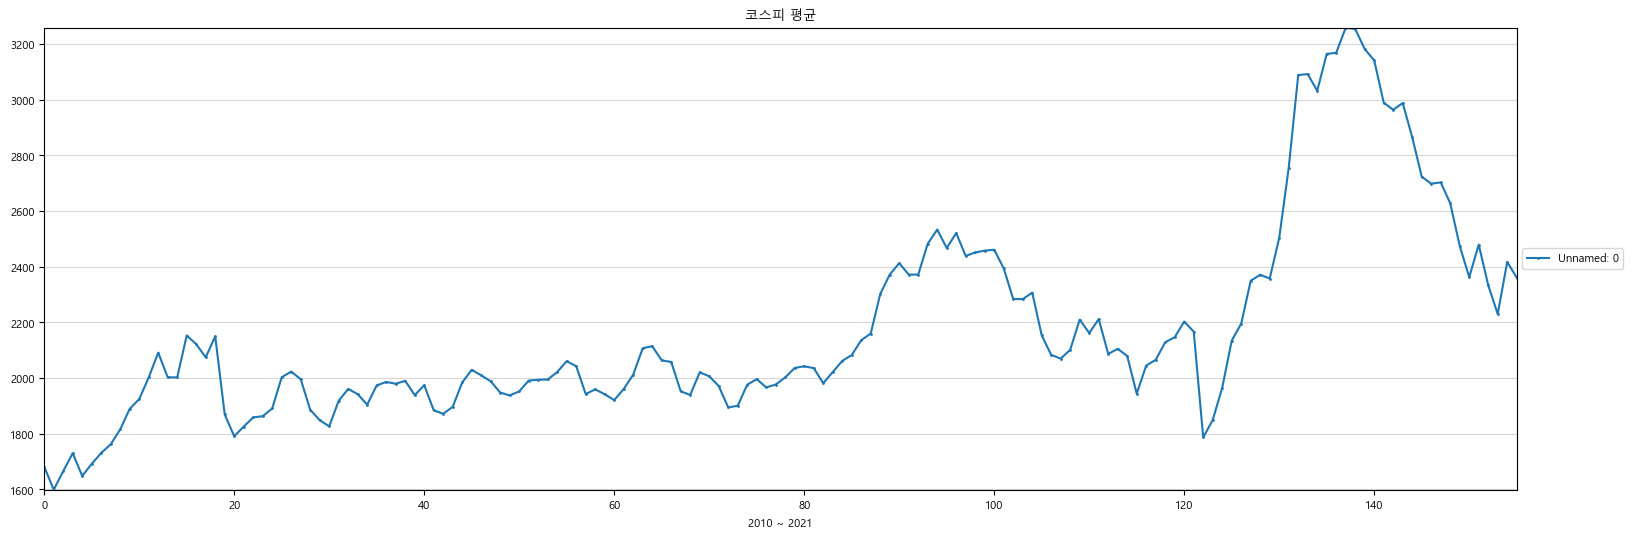

In [29]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df["코스피 평균"], marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('코스피 평균')

# x축 레이블 설정
plt.xlabel('2010 ~ 2021')

# y축 레이블 설정
# plt.ylabel('')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()

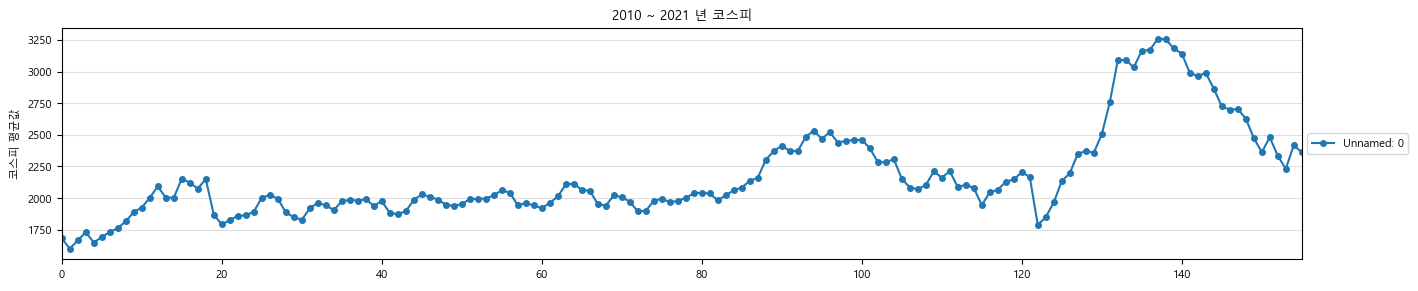

In [37]:
plt.figure(figsize = (16,3))
plt.plot(df["코스피 평균"], marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(df.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2010 ~ 2021 년 코스피')
plt.xlabel('')
plt.ylabel('코스피 평균값')
plt.autoscale(axis='x', tight=True)
plt.show()

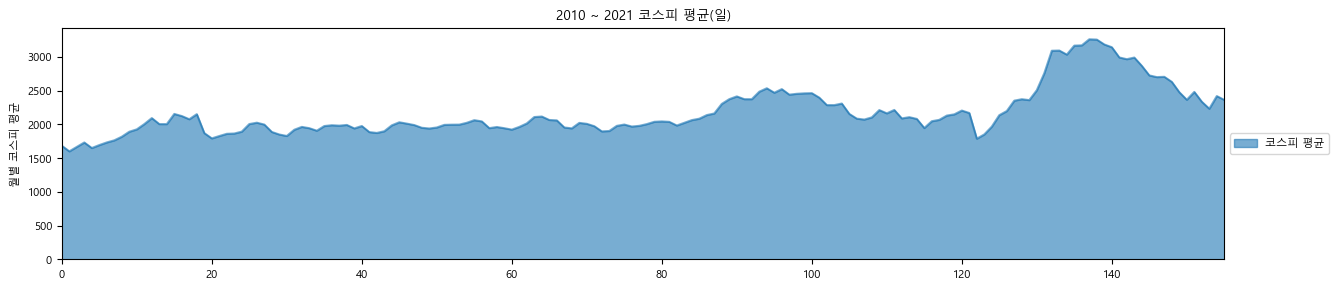

In [40]:
title='2010 ~ 2021 코스피 평균(일)'
ylabel='월별 코스피 평균'
xlabel=''

ax = df["코스피 평균"].plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
# 상관관계
for i, item in enumerate(df):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(7, 7))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("")

AttributeError: 'str' object has no attribute 'corr'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  156 non-null    int64  
 1   연도          156 non-null    int64  
 2   월           156 non-null    int64  
 3   코스피 평균      156 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.0 KB


In [42]:
usage.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'customer', 'wh', 'kwh'],
      dtype='object')

In [43]:
usage[['customer', 'wh', 'kwh']]

,customer,wh,kwh
0,783260,49968118.15,11154070.87
1,783281,43576388.06,10820313.94
2,783288,44345831.21,10577876.27
3,783288,49666971.53,11410542.58
4,783310,44114435.78,11097614.74
...,...,...,...
725,800308,31743683.54,9442942.40
726,802036,32641190.23,9679363.18
727,803784,58820056.15,11754265.48
728,805066,52733978.57,12149583.10
